# Multi-Class  Dog Breed Classification

This notebook builds end to end multiclass image classifier using TensorFlow and TensorFlow Hub

## 1. Problem :
Identify the Breed of dogs from the given data

## 2. Data:
120 images of different breeds of dogs stored in google drive

## 3. Evaluation:
Predict the probabilty of finding the correct breed

## 4. Features:
Some info about the data:
* Unstructured (Images)
* We use Deep/Transfer Learning


### Getting Our Work Space Ready
* Import TensorFlow
* Import TensorHub
* Use GPU

In [1]:


# importing necessary tools
import tensorflow as tf
import tensorflow_hub as hub

# Check for GPU
print("GPU","available (YESS!!!)" if tf.config.list_physical_devices("GPU") else "NO")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

GPU available (YESS!!!)


# 2. Data

* Getting our data ready and turn into tensors ( Our data has to be in numerical form)

In [105]:
#!unzip "/content/drive/MyDrive/Dog-Breed Prediction/dog-breed-identification.zip" -d "drive/MyDrive/Dog-Breed Prediction/"

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

csv_label=pd.read_csv("/kaggle/input/dog-breed-identi/labels.csv")
csv_label.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [107]:
csv_label["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

<Axes: >

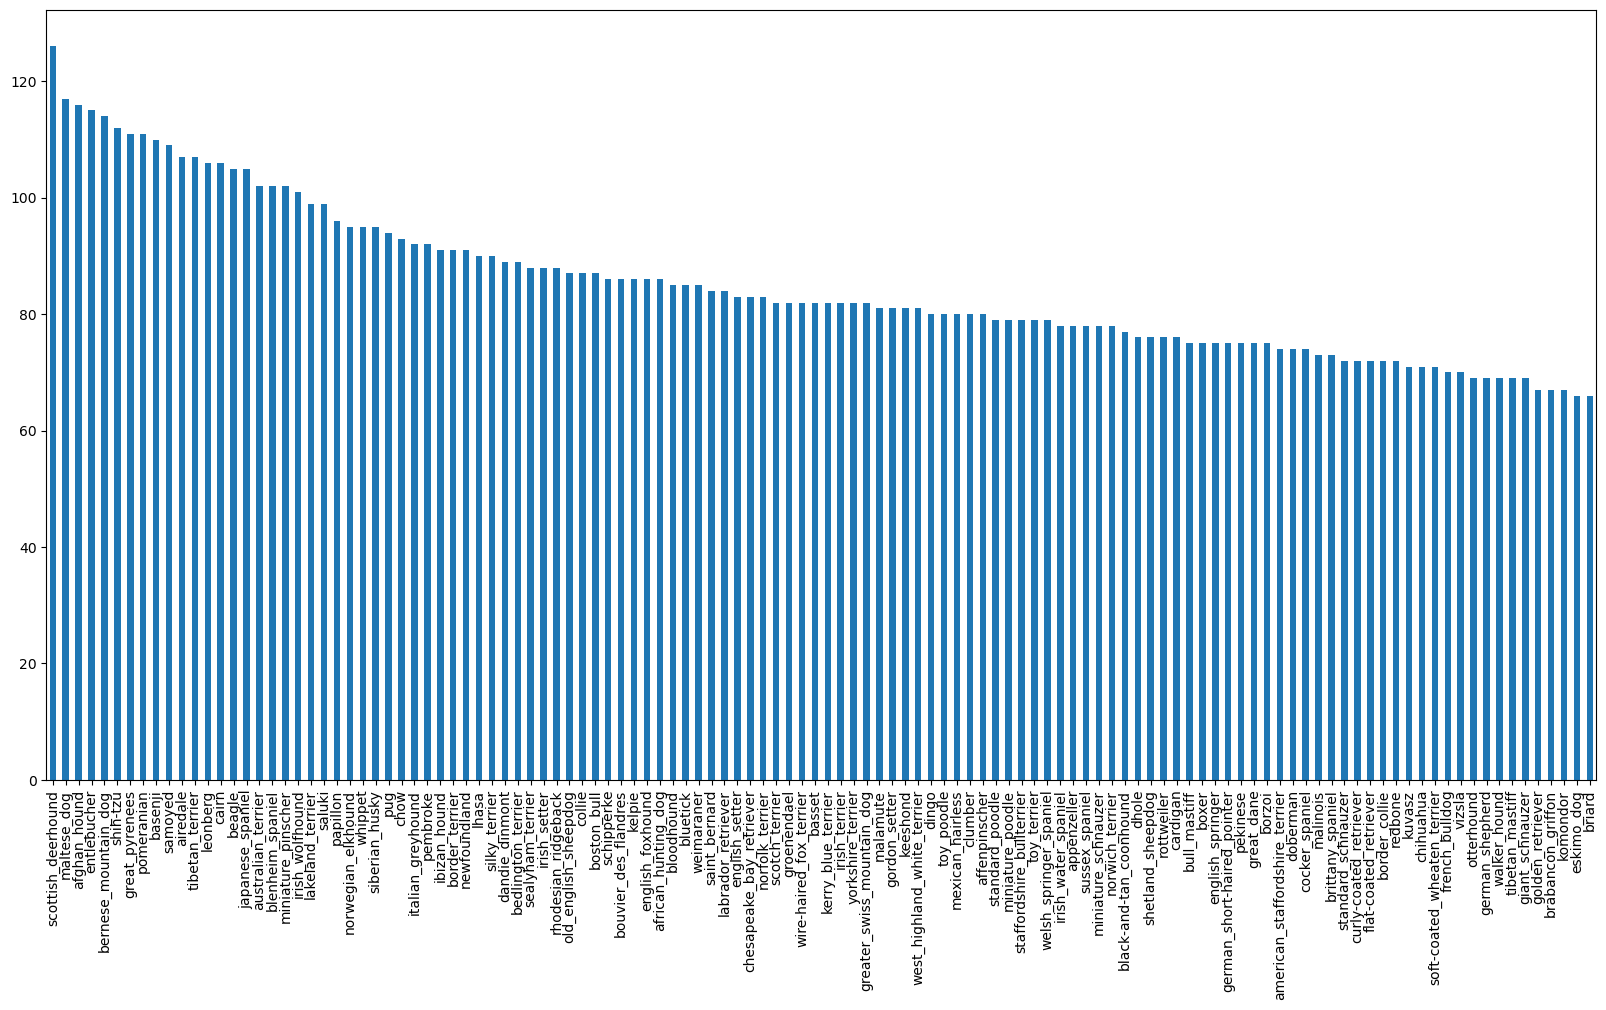

In [3]:
csv_label["breed"].value_counts().plot.bar(figsize=(20,10))

In [4]:
# Every breed contains atlealst this much samples
csv_label["breed"].value_counts().median()

82.0

## Getting Images and thier label
 Lets get a list of all images and thier labels

In [5]:
filenames = ["/kaggle/input/dog-breed-identi/train/"+fnames+".jpg" for fnames in csv_label["id"]]
filenames[:10]


['/kaggle/input/dog-breed-identi/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/kaggle/input/dog-breed-identi/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/kaggle/input/dog-breed-identi/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/kaggle/input/dog-breed-identi/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/kaggle/input/dog-breed-identi/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/kaggle/input/dog-breed-identi/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/kaggle/input/dog-breed-identi/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/kaggle/input/dog-breed-identi/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/kaggle/input/dog-breed-identi/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/kaggle/input/dog-breed-identi/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

Since we have got our training image in a list lets prepare our labels

In [6]:
import numpy as np
labels = csv_label["breed"].to_numpy() # convert into array
# labels = np.array(labels) # Does the same thing
len(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [7]:
# compare number of labels to filename to check missing data
if len(labels)==len(filenames):
  print("Good")

Good


In [8]:
# Find the unique values
unique_breed=np.unique(labels)
len(unique_breed)

120

In [9]:
labels[0] == unique_breed

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [10]:
# Turn every label into boolean array
boolean_labels= [label == np.array(unique_breed) for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [11]:
# turning every boolean array to int
print(labels[0])
print(np.where(unique_breed==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))


boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [12]:
# Setup x & y
x=filenames
y=boolean_labels



# we are going to start off experiamenting with -1000 images

NUM_IMAGES = 1000 #@param {type:"slider",min:1000,max:10000}


In [13]:
# lETS SPLIT INTO TRAIN AND VALIDATION
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val =train_test_split(x[:1000],
                                              y[:1000],
                                              test_size=0.2,

                                              random_state=42)
len(x_train),len(y_train),len(x_val),len(y_val)
x_train[:5]

['/kaggle/input/dog-breed-identi/train/00bee065dcec471f26394855c5c2f3de.jpg',
 '/kaggle/input/dog-breed-identi/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 '/kaggle/input/dog-breed-identi/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 '/kaggle/input/dog-breed-identi/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 '/kaggle/input/dog-breed-identi/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg']

## Preprocessing the images ( Turning images into tensors)

we are goung to write a function which does
1. Take image file path as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. TUrn our `image` (a jpg) into tensors
4. Resize the `image` to (224,224)

In [14]:
 # COnvert an image into numpy array
from matplotlib.pyplot import imread


In [15]:
image = imread(filenames[42])
image.shape


(257, 350, 3)

In [16]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [17]:
# Define image size
IMG_SIZE = 224

def preprocess_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

 ## Turning our data into batches

 Inorder to use tensorflow effectiviely we need our data in form of tensor tuples like `(image,label)`


  


In [18]:
# Create a func to return the tuple

def get_image_label(img,label):
  image =preprocess_image(img)
  return image,label


In [19]:
(preprocess_image(filenames[42]),tf.constant(boolean_labels[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [20]:
get_image_label(filenames[42],labels[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we hve got our data as tuples.lets make a fuc to turn all our data into batches

In [21]:

# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(preprocess_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [22]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [23]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

## VIsualizing data batches



In [24]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5,i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breed[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

In [25]:
train_images,train_labels = next(train_data.as_numpy_iterator()) # unbatching


In [26]:
train_labels

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
# Now lets visualize train data
show_25_images(train_images,train_labels)

In [ ]:
val_images,val_labels= next(val_data.as_numpy_iterator())

show_25_images(val_images,val_labels)

## Building a model

Before we build a model, there are a few things we need to define:
* The input shape (our image shape) to our model
* THe output shape of our model
* URL of the model we want to use


In [27]:
# Setup input/output shape
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3] # batch,height,width,colour chanel
OUTPUT_SHAPE = len(unique_breed)

# Setup model URL frm Tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"


Now we have got our input/ouputs and model ready lets put them ito keras deep laearning model

lets create function which:
* Takes ip/op and model
* defines layers in keras model in sequantial
* compile
* build

In [28]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

  return model

In [29]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Createing callbacks



In [ ]:
# Tensorboard callback // for checking progrss
%reload_ext tensorboard

In [30]:
import datetime
import os
# # Create a func to build tensorbord callback
# def create_tensorboard_callback():
#   logdir = os.path.join("/content/drive/MyDrive/Dog-Breed Prediction/logs", # logs get tracked
#   datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

#   return tf.keras.callbacks.TensorBoard(logdir)# get exact curnrt time


### Early stoping  callback

helps stop from overfitting

In [31]:
# create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model(on subset of data)
our 1st model is only going to train on 1000 images to make sure everything is working

In [32]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Lets create a fuction which trains a model.

* Create a model using `create_model`
* Setup a tensorboard callback using `create_tensorboard_callback`
* Call the `fit()` pasing training data,validation data,no of epochs and call backs

In [33]:
def train_model():
  # Create a model
  model =  create_model()
  # Create a new tensorboard session everytime we train a model
#   tensorboard =  create_tensorboard_callback()

  # FIt the model to the data
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[ early_stopping])
  return model

In [34]:
# Fit the model to data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 22s 262ms/step - loss: 4.6655 - accuracy: 0.0913 - val_loss: 3.4808 - val_accuracy: 0.1750
Epoch 2/100
25/25 [==============================] - 4s 146ms/step - loss: 1.6839 - accuracy: 0.6612 - val_loss: 2.1611 - val_accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 4s 143ms/step - loss: 0.5681 - accuracy: 0.9388 - val_loss: 1.6622 - val_accuracy: 0.5750
Epoch 4/100
25/25 [==============================] - 3s 127ms/step - loss: 0.2544 - accuracy: 0.9875 - val_loss: 1.4513 - val_accuracy: 0.6100
Epoch 5/100
25/25 [==============================] - 3s 121ms/step - loss: 0.1479 - accuracy: 0.9975 - val_loss: 1.3888 - val_accuracy: 0.6200
Epoch 6/100
25/25 [==============================] - 3s 110ms/step - loss: 0.1009 - accuracy: 0.9987 - val_loss: 1.3495 - val_accuracy: 0.6200
Epoch 7/100
25/25 [=============================

 Our model is over fittung because its performing far better on training data than valid data

## Checking the tensorboard logs

In [35]:
# %tensorboard --logdir drive/MyDrive/Dog-Breed\ Prediction/logs --load_fast=false


## Msking and evalating preiction usding trainedmodel

In [36]:
# on validation data
prediction =model.predict(val_data, verbose=1)
prediction

7/7 [==============================] - 5s 91ms/step


array([[1.1094847e-03, 7.1464179e-05, 1.8359220e-03, ..., 3.7322092e-04,
        2.7924298e-05, 2.8173660e-03],
       [7.9628703e-04, 6.6639780e-04, 5.2433843e-03, ..., 2.4886781e-04,
        1.8387852e-03, 1.7410213e-05],
       [4.6597766e-06, 4.1300544e-04, 1.2055431e-06, ..., 7.2977491e-05,
        4.8037364e-05, 3.4508473e-04],
       ...,
       [6.1403921e-06, 4.6313020e-05, 7.7227713e-05, ..., 8.8093759e-07,
        1.6207311e-04, 8.7579683e-05],
       [3.7105512e-03, 4.1928084e-04, 1.3867453e-04, ..., 1.4023787e-04,
        1.3110970e-04, 1.7487353e-02],
       [1.9963467e-03, 4.8562302e-05, 3.4784214e-03, ..., 3.0355831e-03,
        8.2052010e-04, 3.3891498e-04]], dtype=float32)

In [37]:
prediction.shape

(200, 120)

In [38]:
np.sum(prediction[0])

1.0

In [39]:
# First prediction
print(prediction[0]) # prediction probability
print(f"Max value (probability of prediction): {np.max(prediction[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(prediction[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(prediction[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breed[np.argmax(prediction[0])]}") # the predicted label

[1.10948470e-03 7.14641792e-05 1.83592201e-03 1.85990488e-04
 1.34408750e-04 8.91349264e-05 1.28851114e-02 7.14550479e-05
 1.01966965e-04 1.79946102e-04 1.84149219e-04 1.52271954e-04
 1.57331451e-04 8.77382117e-05 8.27340482e-05 4.02249512e-04
 6.23898013e-05 1.72582775e-01 3.38640857e-05 4.28133382e-04
 1.78299699e-04 1.07831773e-04 1.22103966e-05 1.49478775e-03
 2.26372751e-04 8.23645096e-05 7.37181082e-02 4.68647631e-05
 1.57373390e-04 5.00855931e-05 1.57070681e-04 9.58172139e-04
 1.84115939e-04 6.23701999e-06 5.84743502e-05 4.28607836e-02
 1.05103118e-05 2.14709202e-04 6.28002599e-05 3.89542802e-05
 1.96295767e-03 1.54065183e-05 5.04178286e-04 1.15006682e-04
 6.18407284e-05 6.26094406e-05 1.41765786e-05 3.30042494e-05
 5.88898489e-04 2.01951421e-04 5.77989449e-05 1.07172809e-05
 6.48033965e-05 1.16830146e-04 1.12922389e-04 1.20202558e-05
 1.56289214e-04 5.88063290e-03 9.93196853e-04 2.06404597e-01
 8.25136609e-04 1.21336097e-05 2.61346321e-03 1.60643831e-05
 5.23662777e-04 1.179229

In [40]:
# fuction to convert prediction probabilities into predicted labels
def get_pred_label(pred_prob):
  return unique_breed[np.argmax(pred_prob)]

pred_label = get_pred_label(prediction[0])
pred_label

'irish_wolfhound'

Since our validation data (`val_data`) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (using [`unbatch()`]

In [41]:

images_ = []
labels_ = []

for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)


In [42]:
get_pred_label(labels_[0])

'cairn'

In [43]:
# create func to unbatch
def unbatchify(data):
  images = []
  labels = []

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(label)
  return images,labels

# unbatchyfing valid data
val_images,val_labels =unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [44]:
get_pred_label(val_labels[0])

'cairn'

Now we got ways to get:
* Prediction lable
* Validation labels
* validation images

lets make a func to visaualize
which take a array of predtion probabilities, an array of thruth labels and array of images and int
convert prediction probabilities to predicted label and plot everything in a single plot


In [45]:
def plot_pred(pred_prob,true_label,image,n):

  pred_prob, true_label, image = pred_prob[n], true_label[n], image[n]


  pred_label=unique_breed[np.argmax(pred_prob)]
  plt.imshow(image)

  if pred_label==unique_breed[np.argmax(true_label)]:
    color="green"
  else:
    color='red'


  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      unique_breed[np.argmax(true_label)]),
                                      color=color)

In [46]:
unique_breed[np.argmax(val_labels[42])]

'english_foxhound'

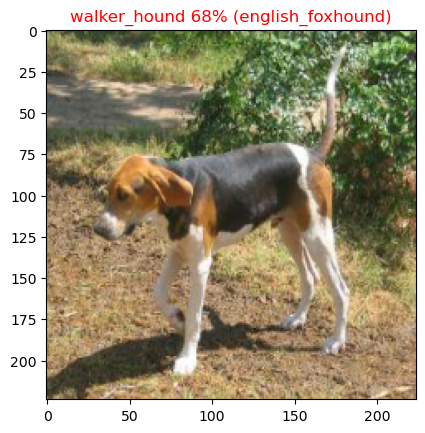

In [47]:
plot_pred(prediction,val_labels,val_images,42)





In [61]:
def plot_bar(prediction_probabilities, labels, n):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)
  tr_label=unique_breed[np.argmax(true_label)]


  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breed[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="red")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(tr_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == tr_label)].set_color("green")
  else:
    pass

  # print(f"Predicted label : {pred_label} ")
  # print(f"Actual label : {tr_label} ")

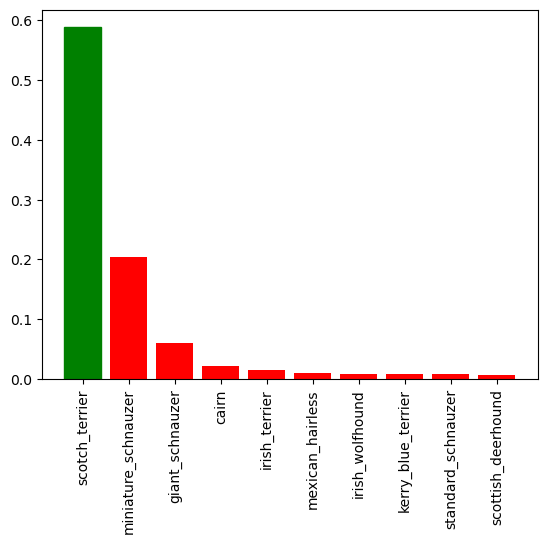

In [62]:
plot_bar(prediction,val_labels,1)

### Now we have got some fuctions to visualise our prediction and evaluate our model

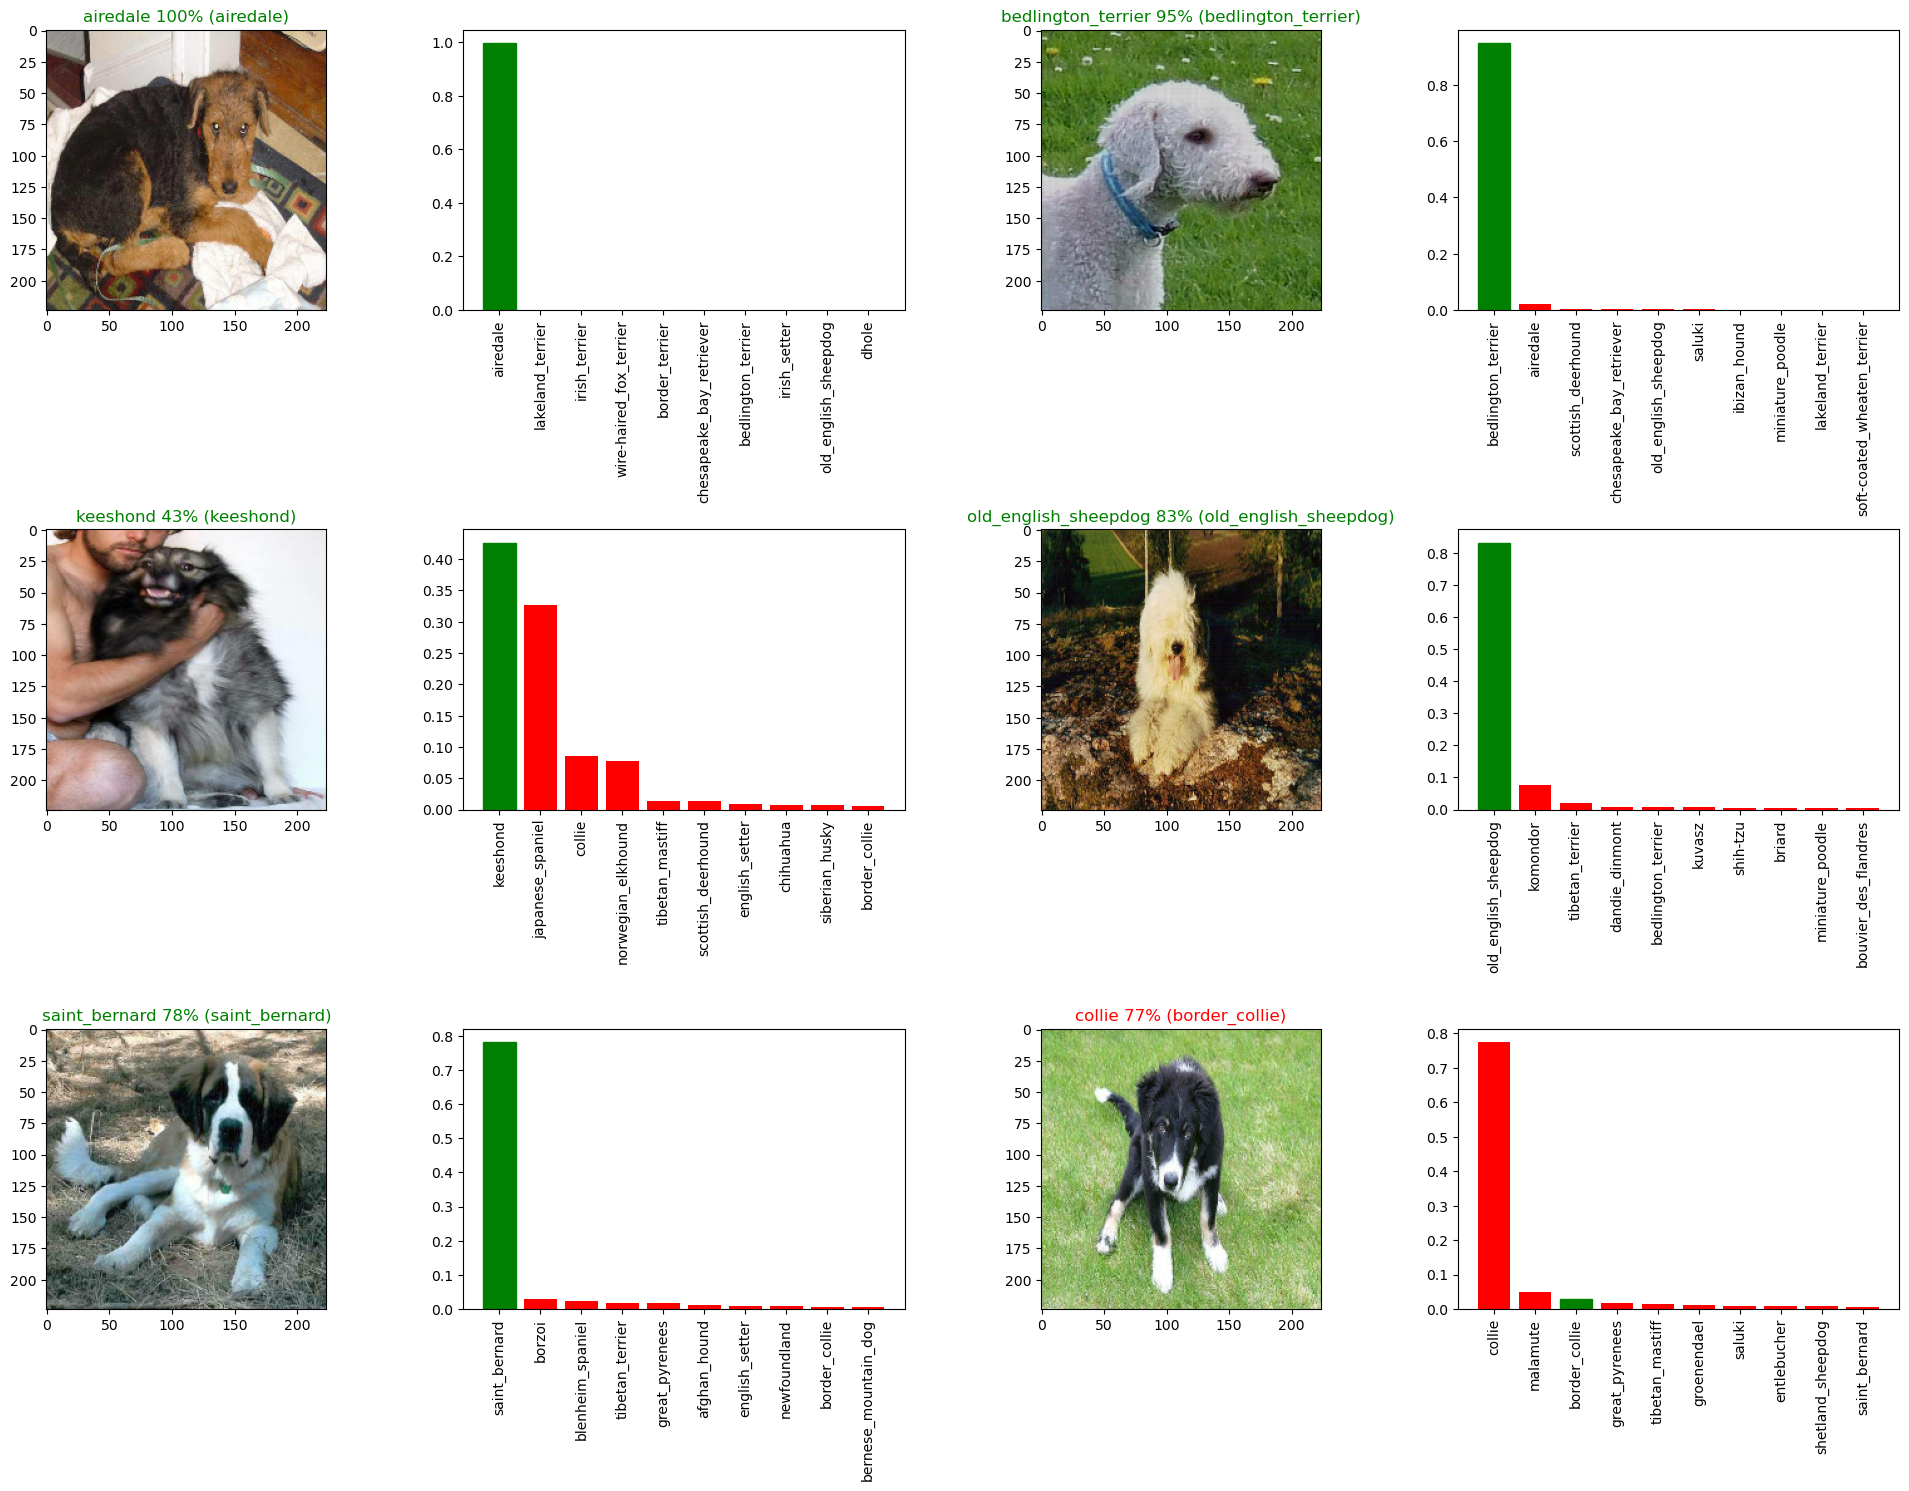

In [63]:
# Let's check a few predictions and their different values
i_multiplier = 4
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction,
            val_labels,
            val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_bar(prediction,
           val_labels,
           i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

### Creating a Confusion matrix with our models prediction and true labels

In [51]:
# #Import the necessary libraries
# import numpy as np
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt


# cm = confusion_matrix(np.argmax(prediction),np.argmax(val_labels))

# #Plot the confusion matrix.
# sns.heatmap(cm,
#             annot=True,
#             fmt='g')


## Saving and reloading

In [ ]:
# # Creaate a function to save a model
# def save_model(model, suffix=None):
#   # model directory with current time
#   modeldir = os.path.join("drive/MyDrive/Dog-Breed Prediction/models",
#                           datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
#   model_path= modeldir + "-" + ".h5"
#   print(f"Saving model to : {model_path}...")
#   model.save(model_path)
#   return model_path

In [ ]:
# def load_model(model_path):
#   """
#   Loads a saved model from a specified path.
#   """
#   print(f"Loading saved model from: {model_path}")
#   model = tf.keras.models.load_model(model_path,
#                                      custom_objects={"KerasLayer":hub.KerasLayer})
#   return model

In [ ]:
# save_model(model, suffix="1000-images-mobilenetv2-Adam")

In [ ]:
# loaded_1000_image_model=load_model("drive/MyDrive/Dog-Breed Prediction/models/20230825-10371692959862-.h5")

In [ ]:
# evaluate the model using the pre saved data
model.evaluate(val_data)

In [ ]:
# # evaluate model using the pre saved data
# loaded_1000_image_model.evaluate(val_data)

## Training a big dog model ( on FULL DATA )

In [52]:
len(x),len(y) # x= filename and y = boolean label

(10222, 10222)

In [53]:
x[:2]

['/kaggle/input/dog-breed-identi/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/kaggle/input/dog-breed-identi/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg']

In [54]:
len(x_train),len(y_train),len(x_val),len(y_val)

(800, 800, 200, 200)

In [55]:
# Create a data batch with full data set

full_data = create_data_batches(x,y)

Creating training data batches...


In [56]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [57]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [58]:
# Create full model call back
# full_model_tensorboard = create_tensorboard_callback()
# We cant check validation accuracy as there is no validation set on training
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)



In [59]:
# Fit the model to full data

full_model.fit(full_data,
               epochs=100,
               callbacks=[full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 58s 168ms/step - loss: 1.3430 - accuracy: 0.6654
Epoch 2/100
320/320 [==============================] - 30s 95ms/step - loss: 0.3995 - accuracy: 0.8855
Epoch 3/100
320/320 [==============================] - 29s 91ms/step - loss: 0.2400 - accuracy: 0.9326
Epoch 4/100
320/320 [==============================] - 30s 93ms/step - loss: 0.1568 - accuracy: 0.9643
Epoch 5/100
320/320 [==============================] - 28s 88ms/step - loss: 0.1078 - accuracy: 0.9777
Epoch 6/100
320/320 [==============================] - 29s 90ms/step - loss: 0.0769 - accuracy: 0.9863
Epoch 7/100
320/320 [==============================] - 30s 94ms/step - loss: 0.0586 - accuracy: 0.9918
Epoch 8/100
320/320 [==============================] - 28s 87ms/step - loss: 0.0464 - accuracy: 0.9950
Epoch 9/100
320/320 [==============================] - 30s 94ms/step - loss: 0.0390 - accuracy: 0.9956
Epoch 10/100
320/320 [==============================] - 28s 88ms/step - 

In [64]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "/kaggle/input/dog-breed-identi/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['/kaggle/input/dog-breed-identi/test/09e51e17e2b756ff2ace8a87bd1443fa.jpg',
 '/kaggle/input/dog-breed-identi/test/f7a32505c12649183c5991ecfa7d68b3.jpg',
 '/kaggle/input/dog-breed-identi/test/bc6d50ffb4644feb34530aa58943e85b.jpg',
 '/kaggle/input/dog-breed-identi/test/7cbc041e79135a572aad87904b5c9c57.jpg',
 '/kaggle/input/dog-breed-identi/test/f3b603f10d6a344f0395fb46b242ff8e.jpg',
 '/kaggle/input/dog-breed-identi/test/db55098d859d27a3c05b0e3fc41d43e7.jpg',
 '/kaggle/input/dog-breed-identi/test/665bab06a3ea861c0812c778486988e3.jpg',
 '/kaggle/input/dog-breed-identi/test/7b57911ea7559cebd6db308125926642.jpg',
 '/kaggle/input/dog-breed-identi/test/df0d6ba158287cb2b3ed6459a22d42ba.jpg',
 '/kaggle/input/dog-breed-identi/test/b80d89ad4a17ac2537ff46d251efcd7c.jpg']

In [65]:
test_batch=create_data_batches(test_filenames,test_data=True)

Creating test data batches...


In [66]:
# prediction
test_prediction=full_model.predict(test_batch,verbose=1)

324/324 [==============================] - 62s 189ms/step


In [67]:
test_images=[]
for image in test_batch.unbatch().as_numpy_iterator():
    test_images.append(image)

In [68]:
test_images[0]

array([[[0.31933647, 0.33894432, 0.3546306 ],
        [0.366534  , 0.37045556, 0.38173148],
        [0.47744575, 0.47618526, 0.47608256],
        ...,
        [0.6190898 , 0.61124665, 0.6151682 ],
        [0.6425561 , 0.63471293, 0.6386345 ],
        [0.6257825 , 0.61793935, 0.6218609 ]],

       [[0.30638343, 0.32599127, 0.34474266],
        [0.32004553, 0.3239671 , 0.33966002],
        [0.45945734, 0.45819682, 0.45859244],
        ...,
        [0.59670544, 0.5888623 , 0.59278387],
        [0.5973697 , 0.58952653, 0.5934481 ],
        [0.65353096, 0.6456878 , 0.6496094 ]],

       [[0.29597574, 0.3155836 , 0.339113  ],
        [0.31538516, 0.31930673, 0.33558825],
        [0.4647117 , 0.46345118, 0.47097918],
        ...,
        [0.52848715, 0.520644  , 0.5245655 ],
        [0.5397569 , 0.53191376, 0.5358353 ],
        [0.5488635 , 0.54102033, 0.5449419 ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

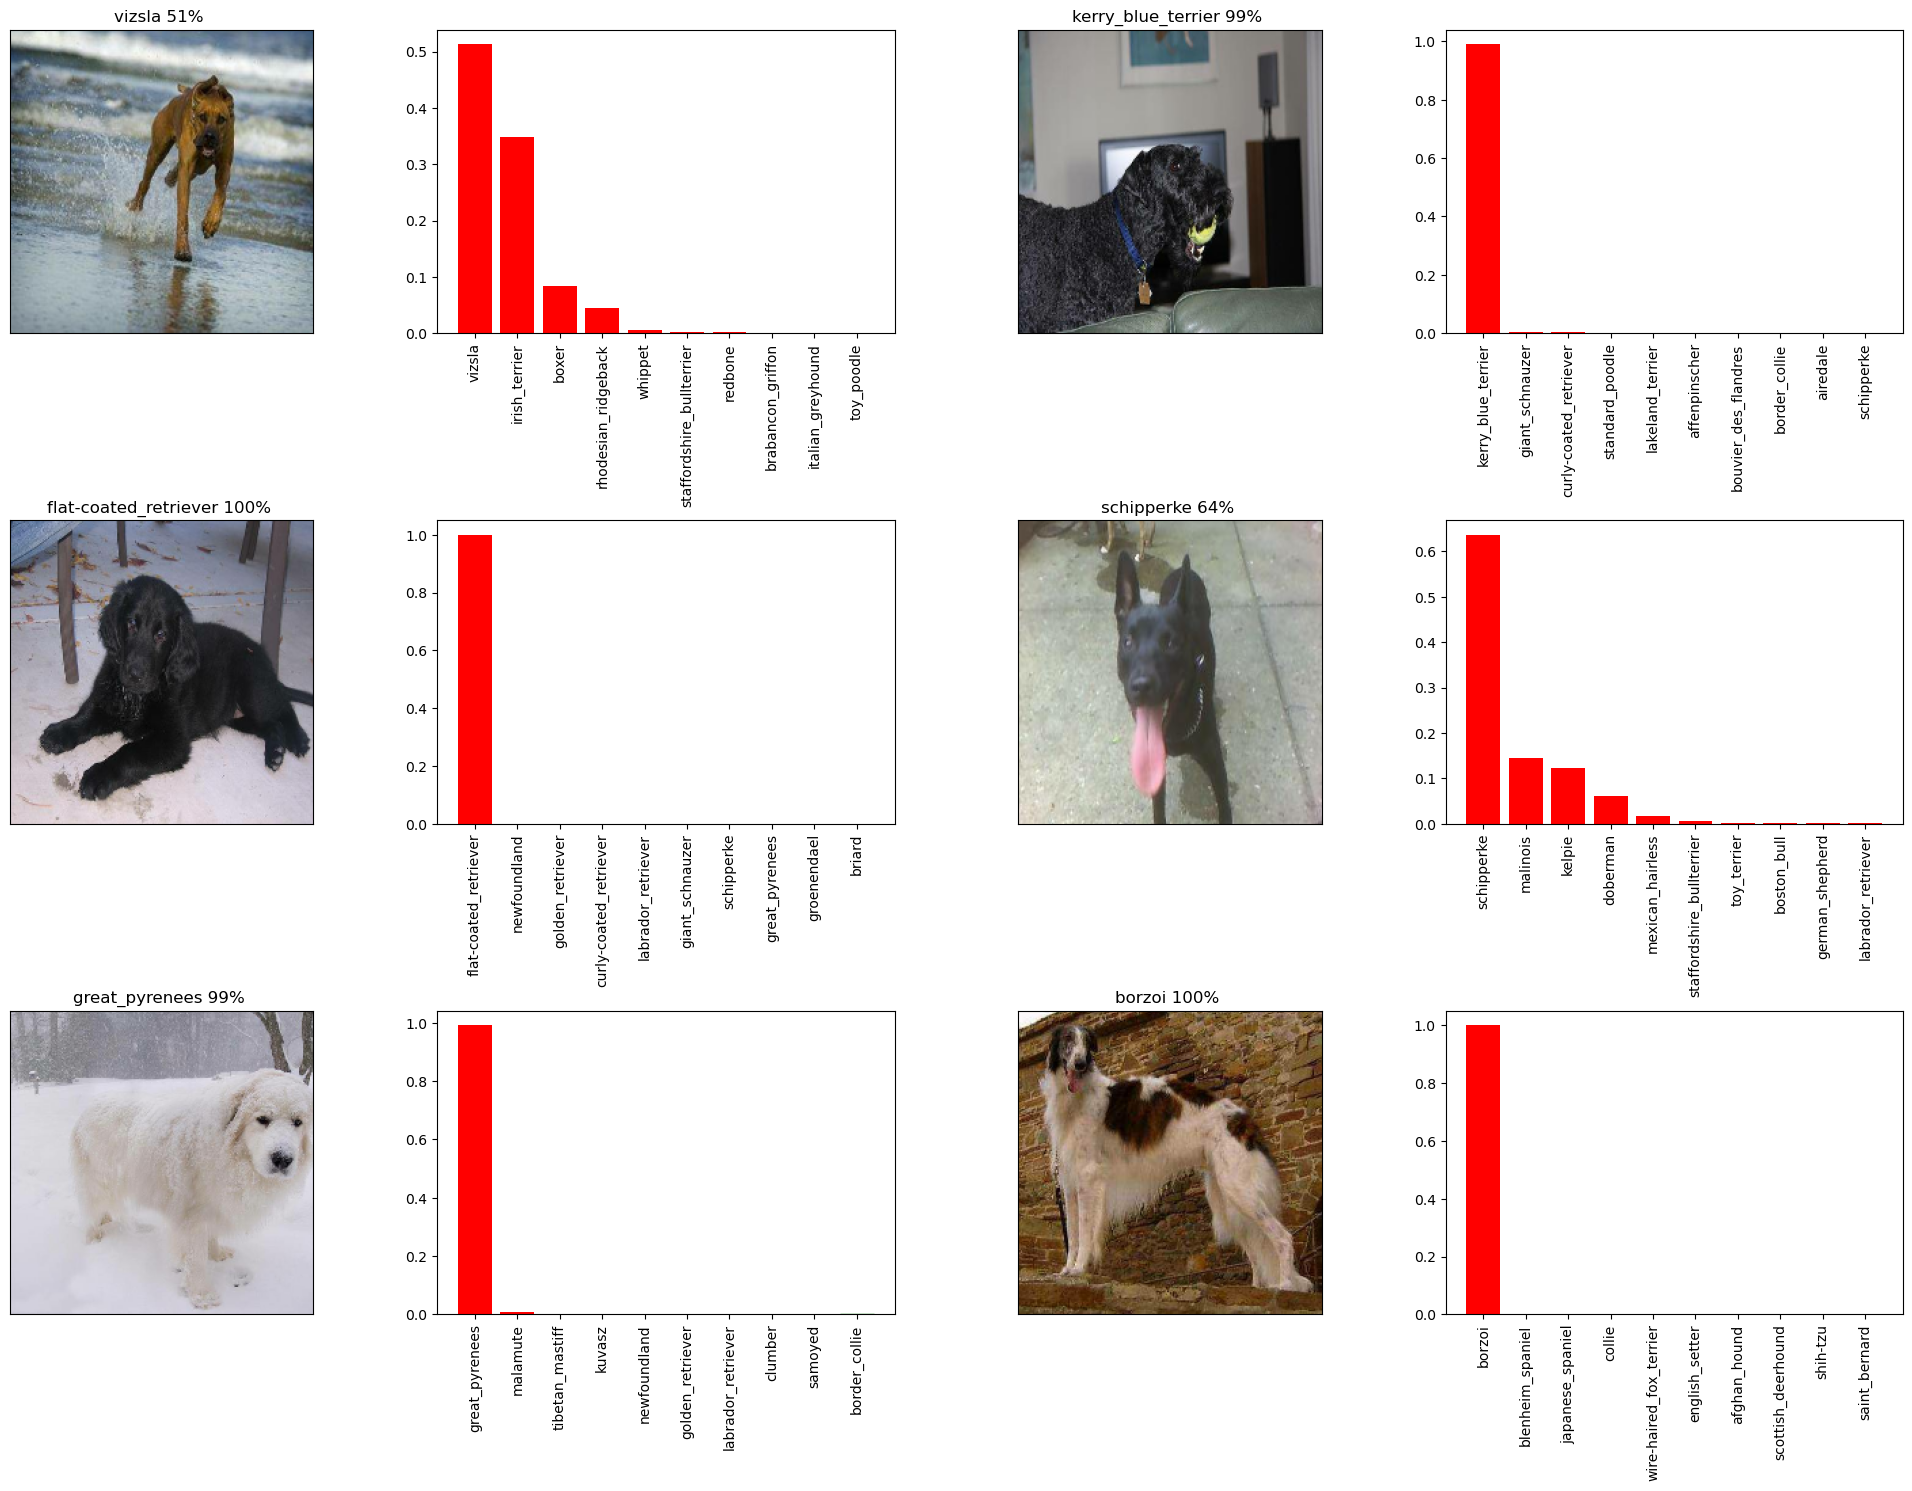

In [71]:
i_multiplier = 5
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)

  plot(test_prediction,
            test_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_bar(test_prediction,
           val_labels,
           i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [70]:
def plot(pred,img,n):

   pred_prob, image = pred[n], img[n]
   pred_label=unique_breed[np.argmax(pred_prob)]

   plt.imshow(image)

   plt.title("{} {:2.0f}% ".format(pred_label,
                                      np.max(pred_prob)*100,
                                     ))
   plt. xticks([])
   plt. yticks([])



In [72]:
# import to keagele format
preds_df = pd.DataFrame(columns=["id"] + list(unique_breed))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [73]:
preds_df["id"]= [fname for fname in os.listdir(test_path)]

In [ ]:
preds_df.head()

In [74]:
preds_df[list(unique_breed)] = test_prediction
preds_df.head()

id  affenpinscher  afghan_hound  \
0  09e51e17e2b756ff2ace8a87bd1443fa.jpg   3.544186e-11  7.316025e-14   
1  f7a32505c12649183c5991ecfa7d68b3.jpg   1.130475e-14  1.493210e-10   
2  bc6d50ffb4644feb34530aa58943e85b.jpg   5.611455e-10  3.028099e-05   
3  7cbc041e79135a572aad87904b5c9c57.jpg   3.587525e-10  6.888074e-13   
4  f3b603f10d6a344f0395fb46b242ff8e.jpg   4.464627e-13  2.126728e-11   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.235006e-09  2.261006e-10                    1.965131e-02   
1         3.976556e-14  7.802749e-12                    1.291807e-10   
2         5.721970e-09  5.468939e-08                    1.097995e-08   
3         5.887354e-14  1.073524e-09                    2.059643e-07   
4         1.610861e-13  1.842253e-09                    1.335869e-12   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  1.610907e-11        1.911492e-08  2.432126e-07  3.369852e-11  ...   
1  6.315428e-11        2.676970e-10  2.196457e-10  2.383642e-09  ...   
2  2.717433e-10        5.779836e-11  3.700181e-11  6.319751e-10  ...   
3  4.790958e-08        6.469127e-10  9.505651e-11  5.351860e-12  ...   
4  5.489196e-10        2.452276e-10  2.586125e-11  4.395871e-09  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  2.900143e-08  3.706602e-08  1.714757e-09  1.159250e-08  9.426170e-12   
1  2.805068e-12  8.736194e-13  3.150644e-07  9.302398e-09  7.681764e-12   
2  2.242074e-11  3.142261e-12  2.812065e-13  1.114369e-09  8.698028e-09   
3  1.485780e-09  1.359238e-09  2.418139e-10  9.457632e-12  6.320232e-05   
4  1.461234e-12  3.610812e-12  9.659280e-11  5.828645e-11  3.112380e-13   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            2.861710e-13                 2.378015e-08  1.116450e-06   
1            2.965303e-12                 5.554360e-15  9.349460e-10   
2            9.043409e-10                 8.417049e-13  3.722590e-09   
3            1.128469e-13                 2.354164e-12  5.240699e-06   
4            9.999841e-01                 3.192871e-11  8.493780e-13   

   wire-haired_fox_terrier  yorkshire_terrier  
0             2.193866e-08       4.544469e-10  
1             1.324821e-12       3.405133e-14  
2             4.713459e-12       7.309433e-12  
3             7.466200e-10       7.727572e-10  
4             4.755236e-13       1.633221e-12  

[5 rows x 121 columns]

In [ ]:
preds_df.to_csv("/content/drive/MyDrive/Dog-Breed Prediction/full_submission_1_mobilienetV2_adam.csv",
                 index=False)

In [75]:
# with custom data
custom_path = "/kaggle/input/custom1/"
custom_filenames = [custom_path + fname for fname in os.listdir(custom_path)]

custom_filenames[:10]

['/kaggle/input/custom1/bernese-mountain-dog.jpg',
 '/kaggle/input/custom1/Beagle-dog_Ross-stevenson_shutterstock-760x507.jpg',
 '/kaggle/input/custom1/neapolitan-mastiff-with-woman-on-leash-2-77685259-2000-81fba6fbcb8244d2adb24e31cc082c78.jpg',
 '/kaggle/input/custom1/images.jpg']

In [76]:
custom_batch=create_data_batches(custom_filenames,test_data=True)
custom_batch

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [77]:
mypredict=full_model.predict(custom_batch,verbose=1)

1/1 [==============================] - 1s 645ms/step


In [78]:
my_images=[]
for image in custom_batch.unbatch().as_numpy_iterator():
  my_images.append(image)

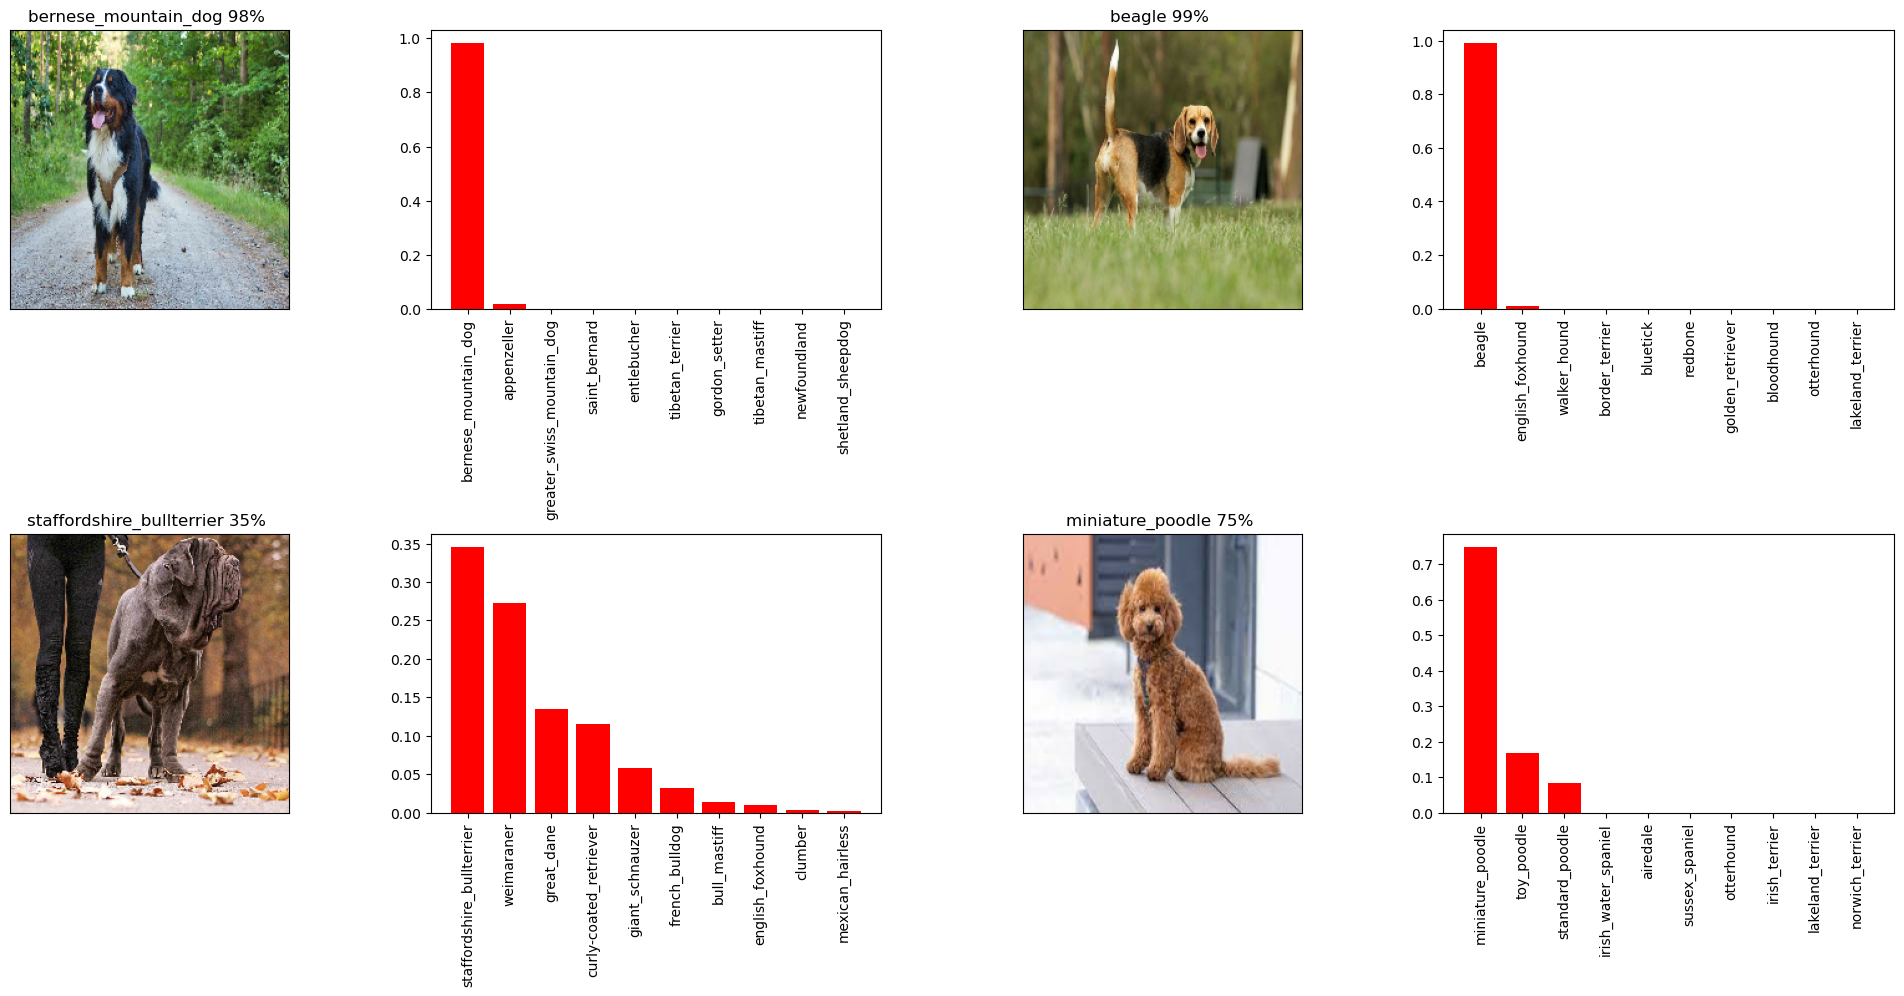

In [80]:
i_multiplier = 0
num_rows = 2
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)

  plot(mypredict,
       my_images,
       n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_bar(mypredict,
           val_labels,
           i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()